In [1]:
import pandas as pd
import os

In [2]:
import torch

In [3]:
torch.cuda.is_available()

True

In [4]:
topic = 'abortion'
scheme = 'EIII_v2'

path = os.getcwd()
clean_path = f'{path}/clean'
NN_path = f'{path}/NN/{topic}/{scheme}'

train_file = f'{path}/train/labeled_{topic}_train.csv'
test_file = f'{path}/test/labeled_{topic}_test.csv'

os.makedirs(NN_path, exist_ok=True)
os.makedirs(f'{clean_path}/train', exist_ok=True)
os.makedirs(f'{clean_path}/test', exist_ok=True)

NN_path

'/media/rinnely/Archer/ENES/Stance/Clasificador/NN/abortion/EIII_v2'

In [3]:
train = pd.read_csv(train_file)

In [4]:
train.head()

,id,Tweet,Label_EI,Stance_EI,Label_EII,Stance_EII,Label_EIII,Stance_EIII,Label_EIII_v2,Stance_EIII_v2,Date
0,1344430216194777090,"FINALMENTE! Argentina Legalizes Abortion, a Mi...",1,Favor,0,Uknown,-1,Against,0,Uknown,2020-12-30 17:48:36
1,1344427711742308354,#Abortion will never be approved on our soil! ...,0,Uknown,0,Uknown,0,Uknown,0,Uknown,2020-12-30 17:38:39
2,1344426576063115267,A HUGE victory for #WomensRights as #Argentina...,0,Uknown,1,Favor,1,Favor,0,Uknown,2020-12-30 17:34:08
3,1344424501006708739,@KLoeffler @KLoeffler CULTURE OF LIFE for all ...,1,Favor,1,Favor,-1,Against,0,Uknown,2020-12-30 17:25:53
4,1344424237617061888,Dems are a death cult. They celebrate abortion...,0,Uknown,0,Uknown,0,Uknown,0,Uknown,2020-12-30 17:24:51


In [5]:
train = train[[f'Label_{scheme}', 'Tweet']]
train.columns = ['Label', 'Tweet']

In [6]:
train.head()

,Label,Tweet
0,0,"FINALMENTE! Argentina Legalizes Abortion, a Mi..."
1,0,#Abortion will never be approved on our soil! ...
2,0,A HUGE victory for #WomensRights as #Argentina...
3,0,@KLoeffler @KLoeffler CULTURE OF LIFE for all ...
4,0,Dems are a death cult. They celebrate abortion...


In [7]:
train.Label.unique()

array([ 0, -1,  1])

In [8]:
train = train.query('Label != 0')
train.Label.unique()

array([-1,  1])

In [9]:
train.groupby('Label').count()

,Tweet
Label,
-1,2617
1,2018


In [10]:
test = pd.read_csv(test_file)
test.head()

,Tweet,Stance,Target
0,Need a ProLife R.E. Agent? - Support a ProLife...,AGAINST,Legalization of Abortion
1,Where is the childcare program @joanburton whi...,AGAINST,Legalization of Abortion
2,I get several requests with petitions to save ...,AGAINST,Legalization of Abortion
3,"we must always see others as Christ sees us,we...",AGAINST,Legalization of Abortion
4,PRAYERS FOR BABIES Urgent prayer one in Lexing...,AGAINST,Legalization of Abortion


In [11]:
test = test[['Stance', 'Tweet']]
test.Stance.unique()

array(['AGAINST', 'FAVOR'], dtype=object)

In [12]:
test['Stance']= test.Stance.replace({'FAVOR':1, 'AGAINST':-1, 'C':0})
test = test.query('Stance != 0')
test.Stance.unique()

array([-1,  1])

In [13]:
test.columns = ['Label', 'Tweet']
test.groupby('Label').count()

,Tweet
Label,
-1,543
1,167


In [14]:
train.shape, test.shape

((4635, 2), (710, 2))

# clean data

In [15]:
import sys
sys.path.insert(0, '/home/rinnely/ENES/Stance')
import cleandata as cd

In [16]:
train = cd.cleanData(train.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')
test = cd.cleanData(test.copy(), label='Tweet', hashtags=True, urls='URL', emojis=True, users='USER')

In [17]:
train = train.dropna(axis=0)

# save data

In [3]:
train.to_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv', index=False)
test.to_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv', index=False)

NameError: name 'train' is not defined

# read data

In [5]:
train = pd.read_csv(f'{clean_path}/train/clean_{topic}_{scheme}_train.csv')
test = pd.read_csv(f'{clean_path}/test/clean_{topic}_{scheme}_test.csv')

<AxesSubplot:ylabel='Label'>

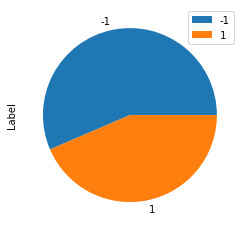

In [4]:
train['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:ylabel='Label'>

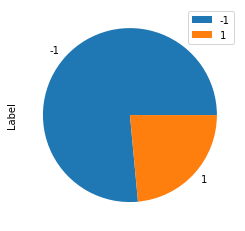

In [5]:
test['Label'].value_counts().plot.pie(legend=True)

<AxesSubplot:>

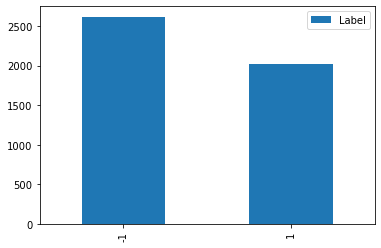

In [6]:
train['Label'].value_counts().plot.bar(legend=True)

<AxesSubplot:>

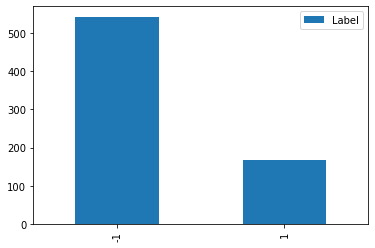

In [7]:
test['Label'].value_counts().plot.bar(legend=True)

In [8]:
train

,Label,Tweet
0,-1,Someone is Missing: British father of aborted ...
1,-1,Don’t let USER and their puppets steal the Sen...
2,-1,#ProLife Buy your ARMS from #NRA It's not ok t...
3,-1,#Indiana Attorney General talks about why some...
4,-1,Fuck you to all the assholes againt #abortion....
...,...,...
4630,-1,What drives women to have #abortions? URL
4631,-1,Common excuse: I will vote #ProLife on the res...
4632,-1,"I completely stand with Polands abortion ban, ..."
4633,-1,Abby Johnson's full remarks at the GOP Convent...


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635 entries, 0 to 4634
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4635 non-null   int64 
 1   Tweet   4635 non-null   object
dtypes: int64(1), object(1)
memory usage: 72.5+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   710 non-null    int64 
 1   Tweet   710 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.2+ KB


In [11]:
train = train.dropna(axis=0)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635 entries, 0 to 4634
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4635 non-null   int64 
 1   Tweet   4635 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.6+ KB


# Training

In [6]:
from fastai.text import *

In [7]:
data_lm = (TextList.from_df(train, NN_path, cols='Tweet')
          .split_by_rand_pct(0.15)
          .label_for_lm() # this does the tokenization and numericalization
          .databunch())

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [6]:
data_lm.show_batch()

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,vote xxup user & & xxup user on xxmaj jan 5 ! ( xxmaj paid for by xxup xxunk xxmaj action ) xxup url xxbos # prolife xxmaj buy your xxup arms from # xxup xxunk xxmaj it 's not ok to end a life through # xxmaj abortion # xxunk for sale xxmaj the xxmaj government hates life xxbos # xxmaj indiana xxmaj attorney xxmaj general talks about why
1,pro life victory at the 5th circuit xxmaj court of appeals : xxmaj texas and xxmaj louisiana can defund planned parenthood through medicaid . xxmaj just the beginning . xxbos xxup .user groups do n't just speak out against abortion -- they raise money to help families choose life . xxup url xxbos a federal judge xxunk an injunction against an xxmaj arkansas law preventing abortions due to a baby
2,” by having an abortion xxbos xxmaj the xxmaj threat of xxunk xxmaj abortion xxmaj bans is xxmaj xxunk xxmaj women ’s xxmaj rights to xxmaj choose xxmaj read more about # reproductiverights and justice and our other core issues at xxup url xxup user xxup user xxup url xxbos # prochoice anyways xxunk abortion is n’t murder xxbos xxup lmao he said xxunk pray to close down a safe
3,"gods love to be with them . xxmaj this is xxup huge ! ! xxbos xxup jesus is coming xxup url xxbos # xxup icymi , xxunk news as xxmaj argentina abortion legalisation bill passes key vote ! xxup url xxbos xxmaj they 'll be doing this when the current legislation is xxunk next year . xxmaj contact your reps . xxmaj make sure they know xxmaj irish people are"
4,"years were at an all time low due to access to medical care & & birth control . xxbos xxup user i 'm the mom of a beautiful adopted daughter and i offer nothing but support and xxunk to women who 've had abortions . xxmaj you can be # prochoice and still be pro adoption , pro birth control , pro xxunk and pro reality . xxup url xxbos"


In [8]:
data_clas = TextClasDataBunch.from_df(NN_path, train_df=train, 
                                      valid_df=test, 
                                      vocab=data_lm.vocab, 
                                      text_cols = 'Tweet', 
                                      label_cols = 'Label',
                                      bs=32)

/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [9]:
data_clas.show_batch()

/home/rinnely/anaconda3/lib/python3.8/site-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


text,target
"xxbos xxup can xxup xxunk xxup stfu xxup worrying xxup about a xxup xxunk xxup body ? ? ? xxup xxunk xxup get xxup mad xxup when xxup xxunk xxup taxes xxup go , xxup because xxup the xxup same xxup girl / xxup woman xxup who xxup wanted a xxup abortion xxup is xxup now xxup on xxup food xxup xxunk xxup to xxup xxunk xxup for xxup the",1
"xxbos xxup user xxup user xxup lol xxup have u xxup done xxup any xxup xxunk xxup on xxup abortion ? ! ? ! ? ? ! xxup its xxup not a xxup baby xxup yet , xxup its a xxup clump xxup of xxup cells . xxup and xxup who xxup are xxup you xxup to xxup tell a xxup woman xxup what xxup to xxup do xxup with",1
"xxbos xxup user xxup user xxmaj yes , i like xxunk - r - i - v - a - t - xxup xxunk xxmaj still too many people xxunk the xxmaj xxunk - xxunk . "" i 'd never have an abortion nah , nah , nah , nah . "" xxmaj ya know what ? xxmaj maybe you would if you were in the same circumstances . xxmaj",-1
xxbos xxup user xxup user xxup user xxmaj xxunk ! xxup what are you talking about ? xxup why did you change the subject ? xxup who said that they supported abortion ? xxmaj but a sin is a xxup sin ! # xxup trump is not # prolife ! xxmaj no way ! xxmaj god cares about xxup all life from the womb to the grave ! # xxmaj,-1
"xxbos xxwrep 6 xxup user 2 . xxmaj xxunk i happen to xxunk & & detest abortion ! xxmaj but i am # prolife ! # xxmaj trump is xxup not pro life , no way ! xxmaj it is a $ $ thing for him ! xxup god xxup cares xxup about xxup all xxup life ! xxmaj from the womb to the grave ! ! xxmaj god cares",-1


In [10]:
f'data_clas_{topic}_{scheme}'

'data_clas_abortion_EIII_v2'

In [11]:
data_lm.save(f'data_lm_{topic}_{scheme}')
data_clas.save(f'data_clas_{topic}_{scheme}')

In [12]:
data_lm.train_ds.vocab.itos[:10], len(data_lm.train_ds.vocab.itos)

(['xxunk',
  'xxpad',
  'xxbos',
  'xxeos',
  'xxfld',
  'xxmaj',
  'xxup',
  'xxrep',
  'xxwrep',
  '.'],
 3304)

In [13]:
#learn = ftxt.language_model_learner(data_lm, arch=ftxt.AWD_LSTM, drop_mult=.2)
learn_lm = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-01
Min loss divided by 10: 4.37E-02


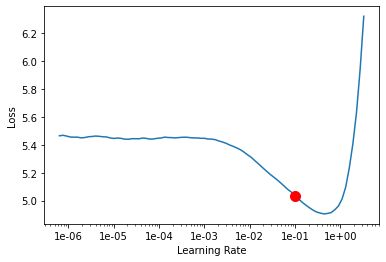

In [14]:
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [15]:
learn_lm.fit_one_cycle(10, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,4.425817,3.765339,0.274585,00:10
1,3.946511,3.737075,0.286798,00:10
2,3.829691,3.936935,0.272959,00:10
3,3.748035,3.950467,0.281282,00:10
4,3.629483,3.909424,0.283100,00:10
5,3.480050,3.889550,0.289668,00:10
6,3.299483,3.853497,0.294005,00:10
7,3.094421,3.834282,0.299904,00:10
8,2.916629,3.807547,0.303444,00:11
9,2.781375,3.801487,0.305261,00:11


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 3.02E-04


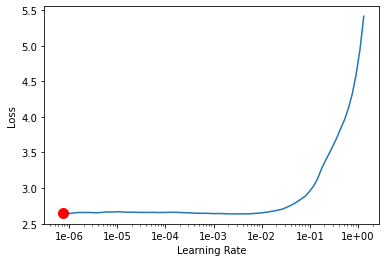

In [16]:
learn_lm.unfreeze()
learn_lm.lr_find(); learn_lm.recorder.plot(suggestion=True)

In [17]:
learn_lm.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.662650,3.776438,0.306856,00:15
1,2.624298,3.754444,0.309471,00:15
2,2.547181,3.770496,0.311703,00:15
3,2.470256,3.790969,0.312213,00:15
4,2.412770,3.791609,0.312691,00:15


In [18]:
learn_lm.save_encoder(f'{topic}_ml_encoder_v1')

In [19]:
learn_lm.load_encoder(f'{topic}_ml_encoder_v1');

In [20]:
learn_lm.save(f'{topic}_model_v1')

In [21]:
learn_lm.load(f'{topic}_model_v1');

In [22]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=.9)

In [23]:
from sklearn.metrics import f1_score

@np_func #converts torch tesnsor as numpy array
def f1_macro(inp, targ): return f1_score(targ, np.argmax(inp, axis=1), average='macro')

In [24]:
learn.load_encoder(f'{topic}_ml_encoder_v1')
learn.metrics=[f1_macro]
learn.freeze()

In [25]:
learn.save('learner-1stage')

In [26]:
learn.load('learner-1stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-03
Min loss divided by 10: 1.20E-02


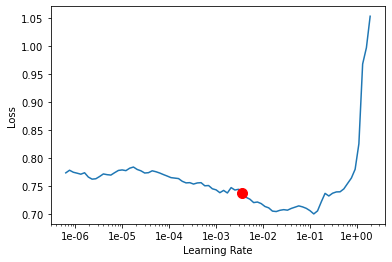

In [27]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [28]:
learn.fit_one_cycle(10, 1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.587462,0.835735,0.472011,00:09
1,0.570747,0.883063,0.504123,00:09
2,0.573092,0.805022,0.528201,00:09
3,0.565795,0.775071,0.493410,00:09
4,0.562742,0.760667,0.540906,00:10
5,0.553843,0.637024,0.607061,00:10
6,0.521349,0.771175,0.531133,00:09
7,0.549005,0.730109,0.558432,00:10
8,0.538288,0.734819,0.540523,00:10
9,0.541291,0.723700,0.550567,00:09


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [29]:
learn.save('learner-2stage')

In [30]:
learn.load('learner-2stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.32E-03


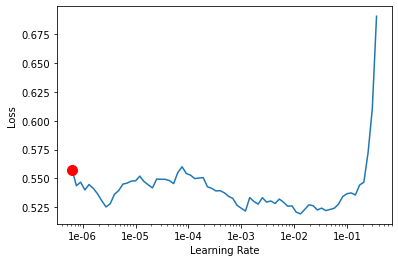

In [31]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [32]:
learn.fit_one_cycle(10, 6e-7, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.544650,0.732086,0.555331,00:09
1,0.538048,0.730473,0.549559,00:09
2,0.538980,0.742060,0.544504,00:10
3,0.545778,0.746560,0.541739,00:10
4,0.532450,0.697216,0.571880,00:09
5,0.544894,0.753772,0.530634,00:10
6,0.532802,0.744791,0.545416,00:10
7,0.543435,0.699794,0.572969,00:11
8,0.550772,0.715102,0.569552,00:11
9,0.543618,0.700799,0.575418,00:11


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [33]:
learn.save('learner-3stage')

In [34]:
learn.load('learner-3stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.74E-06


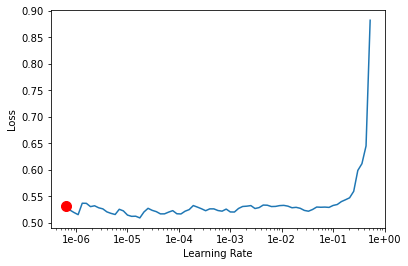

In [35]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [73]:
learn.fit_one_cycle(7,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.525410,0.738236,0.576676,00:10
1,0.550222,0.801544,0.557140,00:11
2,0.550686,0.768147,0.526243,00:11
3,0.549435,0.795083,0.538490,00:11
4,0.545319,0.756286,0.560286,00:11
5,0.527625,0.697784,0.609552,00:10
6,0.544303,0.739838,0.585940,00:11


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [74]:
learn.save('learner-4stage')

In [75]:
learn.load('learner-4stage');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 9.12E-06


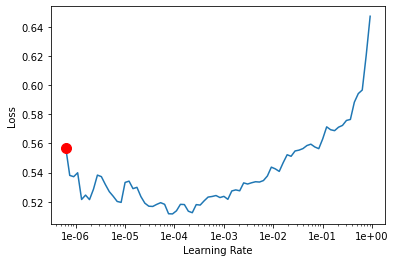

In [36]:
learn.freeze_to(-2)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [37]:
learn.fit_one_cycle(5, moms=(0.8, 0.7));

epoch,train_loss,valid_loss,f1_macro,time
0,0.544062,0.653599,0.595792,00:12
1,0.521874,0.732141,0.565388,00:12
2,0.534793,0.645382,0.600803,00:12
3,0.530717,0.700484,0.575720,00:12
4,0.516724,0.760598,0.549148,00:11


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [38]:
learn.save('learner-freeze-2')

In [39]:
learn.load('learner-freeze-2');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 5.25E-04


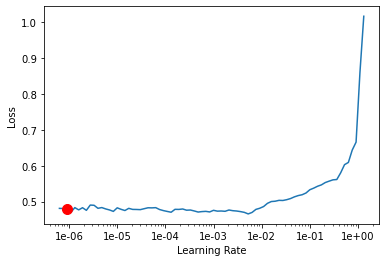

In [40]:
learn.freeze_to(-3)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [42]:
learn.fit_one_cycle(10,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.487166,0.658402,0.632564,00:18
1,0.487579,0.615908,0.633985,00:17
2,0.469013,0.661968,0.631843,00:17
3,0.486839,0.640275,0.640005,00:19
4,0.446075,0.695176,0.636917,00:20
5,0.424314,0.665747,0.639341,00:20
6,0.412739,0.720136,0.618109,00:20
7,0.382599,0.652480,0.647519,00:20
8,0.385517,0.677145,0.650008,00:18
9,0.362346,0.646320,0.647071,00:18


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [43]:
learn.save('learner-freeze-3')

In [44]:
learn.load('learner-freeze-3');

epoch,train_loss,valid_loss,f1_macro,time


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


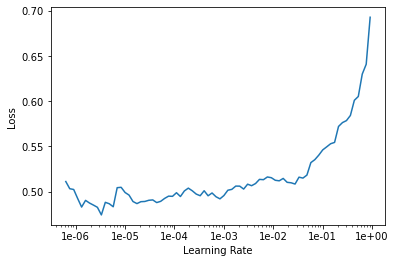

In [41]:
learn.unfreeze()
learn.lr_find(); learn.recorder.plot()

In [42]:
learn.fit_one_cycle(5, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.504440,0.692550,0.609708,00:25
1,0.495144,0.646432,0.632768,00:26
2,0.440885,0.664207,0.644976,00:25
3,0.394959,0.661096,0.642015,00:25
4,0.384233,0.625692,0.653279,00:26


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [34]:
learn.save('learner-unfreeze-65')

In [35]:
learn.load('learner-unfreeze-65');

In [43]:
learn.fit_one_cycle(5, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.372828,0.657972,0.643405,00:26
1,0.357470,0.611512,0.662459,00:24
2,0.332846,0.664317,0.652650,00:24
3,0.306135,0.633783,0.662092,00:26
4,0.302440,0.622647,0.676590,00:25


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [44]:
learn.fit_one_cycle(5, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,f1_macro,time
0,0.289628,0.641053,0.677700,00:24
1,0.312565,0.596784,0.697079,00:28
2,0.282386,0.664747,0.680676,00:26
3,0.279029,0.672892,0.680435,00:25
4,0.250003,0.649642,0.684861,00:29


/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/rinnely/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dty

In [45]:
learn.save('learner-unfreeze-697')

In [47]:
learn.load('learner-unfreeze-697');

In [48]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = TextClassificationInterpretation(learn, preds, y, losses)

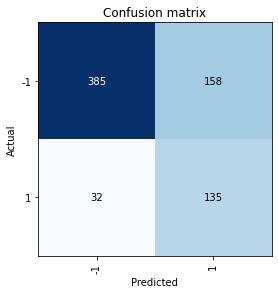

In [49]:
interp.plot_confusion_matrix()

In [63]:
preds

tensor([[9.9521e-01, 4.7914e-03],
        [2.2647e-02, 9.7735e-01],
        [9.8823e-01, 1.1774e-02],
        ...,
        [9.9284e-01, 7.1579e-03],
        [9.9999e-01, 1.1832e-05],
        [1.7161e-01, 8.2839e-01]])

In [50]:
learn.save('learner-final')